In [1]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
t_file = "trump_1811_1604410542"
b_file = "biden_1817_1604410734"

In [3]:
df_t = pd.read_csv("../data/processed/"+t_file+"_exploded.csv")
counts_t = df_t["hashtags"].value_counts()

In [4]:
df_b = pd.read_csv("../data/processed/"+b_file+"_exploded.csv")
counts_b = df_b["hashtags"].value_counts()

In [5]:
df_t["source"]="trump"
df_b["source"]="biden"

Create multiple pie plots to show the affiliation to each party

D:\Dev\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Dev\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0, flags=flags)


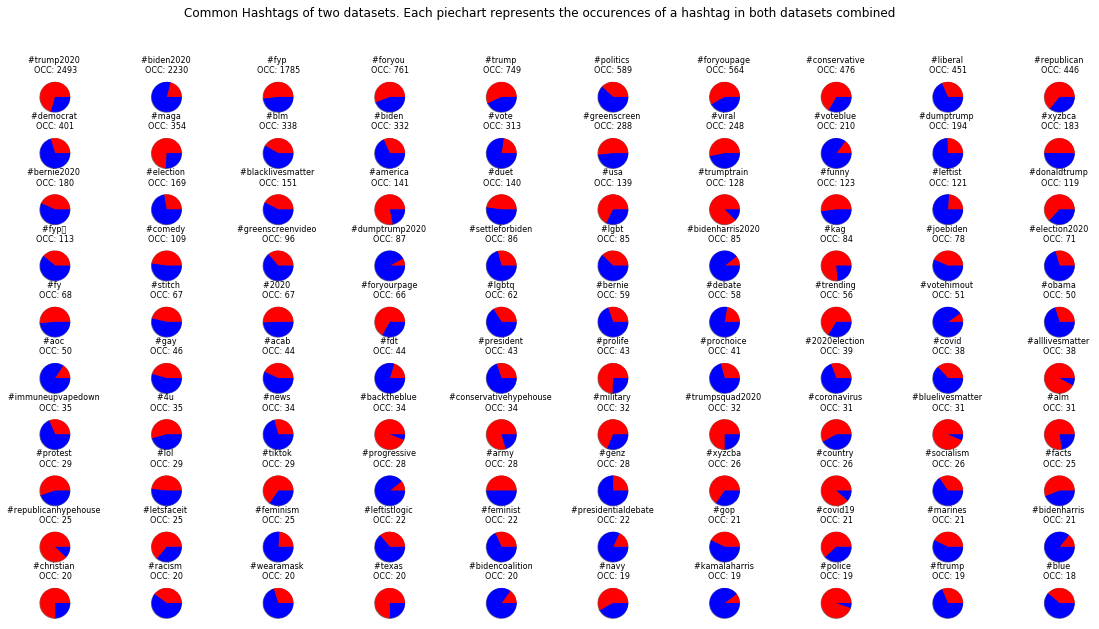

In [6]:
both = pd.concat([df_t,df_b])
n = 10
counts_both = both["hashtags"].value_counts().nlargest(n*n)

fig,axs = plt.subplots(n,n,figsize=(n*2, n), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
fig.suptitle("Common Hashtags of two datasets. Each piechart represents the occurences of a hashtag in both datasets combined")
axs = axs.ravel()

for i,hashtag in enumerate(counts_both.index):
    t = counts_t[hashtag]
    b = counts_b[hashtag]
    axs[i].pie([t,b],colors=["red","blue"],shadow=True)
    axs[i].set_title("#"+hashtag+" \nOCC: "+str(counts_t[hashtag]+counts_b[hashtag]))
    axs[i].title.set_size(8)

plt.show()

Generate a dataframe with occurences for a hashtag from each party

In [7]:
import math as math
import scipy.stats as sps
from collections import defaultdict

n = 1000
dictA = dict(both[both["source"]=="trump"].hashtags.value_counts().nlargest(n))
dictB = dict(both[both["source"]=="biden"].hashtags.value_counts().nlargest(n))

sumValuesA = sum(dictA.values())
sumValuesB = sum(dictB.values())

dictAB = {key: (value, dictB.get(key)) for key, 
          value in dictA.items() if key in dictB.keys()}

df = pd.DataFrame(dictAB)
df = df.T
df.reset_index(level=0, inplace=True)
df.columns = ["source","trump","biden"]
df.head(5)

,source,trump,biden
0,trump2020,1759,734
1,fyp,927,858
2,biden2020,468,1762
3,trump,426,323
4,foryou,425,336


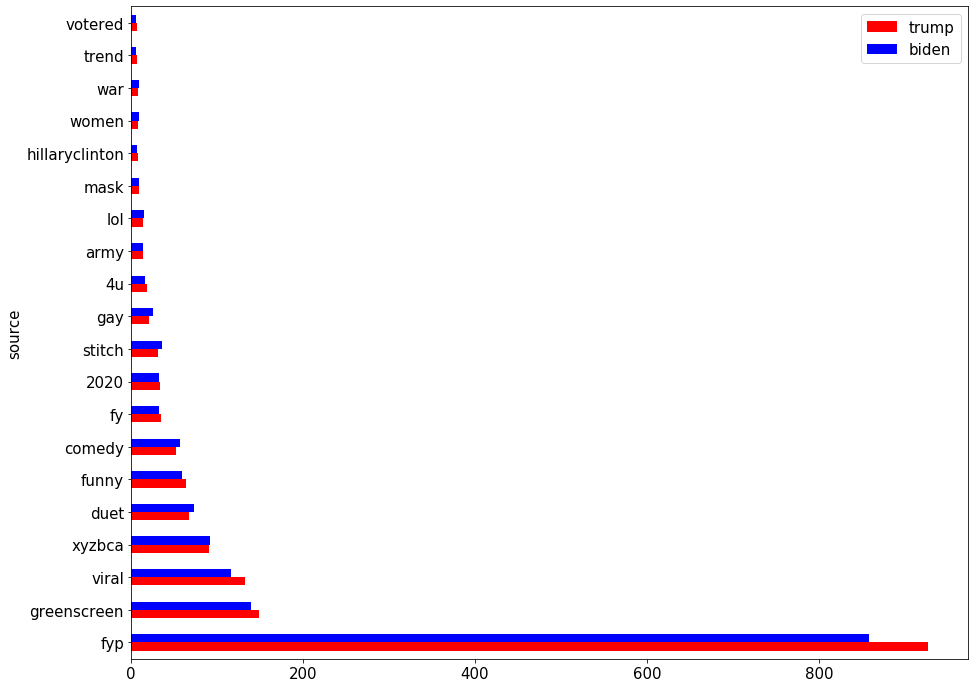

In [188]:
f = df.drop(df[abs((df.trump/(df.trump+df.biden)*100) - 50) > 5].index)
f.head(20).plot.barh(x="source", y=["trump","biden"], color=["red","blue"],figsize=(15,12))

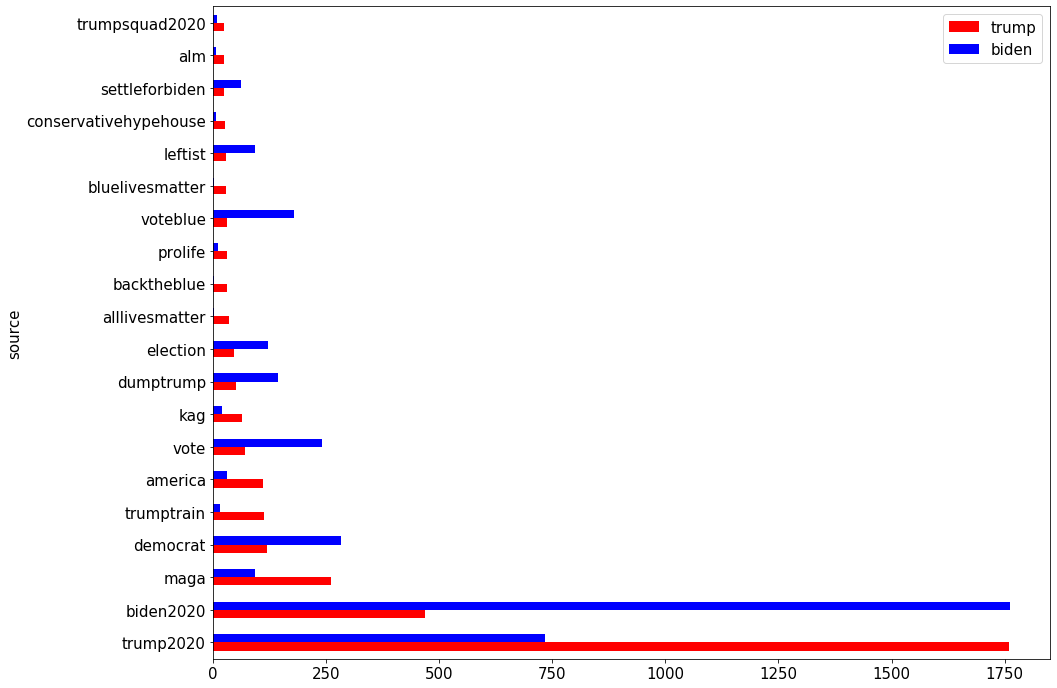

In [189]:
f = df.drop(df[abs((df.trump/(df.trump+df.biden)*100) - 50) < 20].index)
f.head(20).plot.barh(x="source", y=["trump","biden"], color=["red","blue"],figsize=(15,12))

<Figure size 432x288 with 0 Axes>

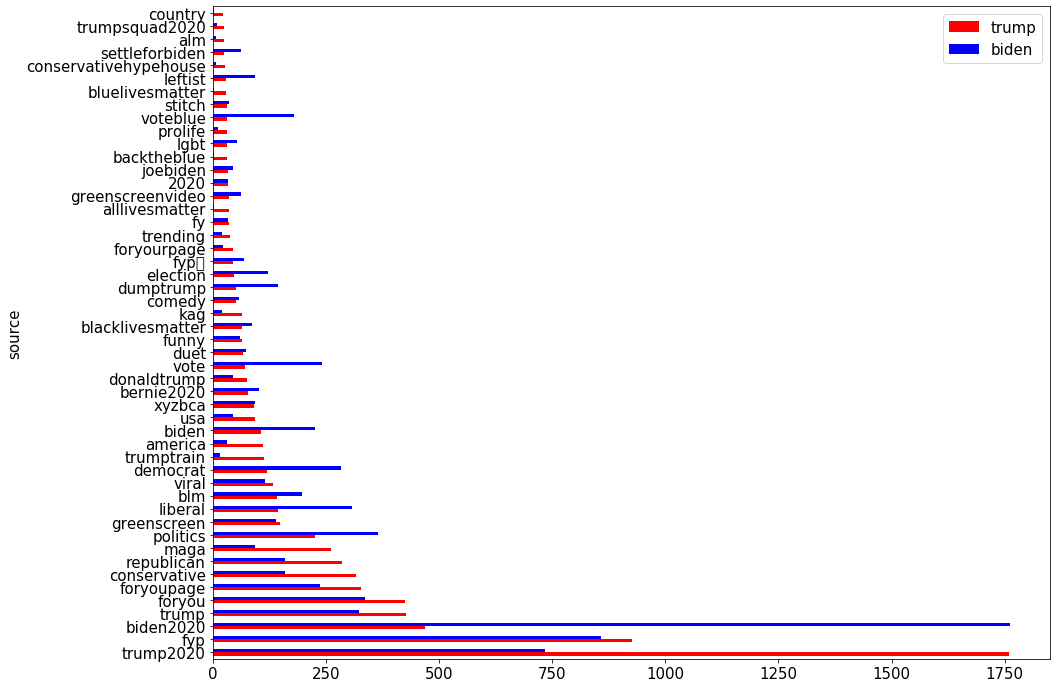

In [190]:
plt.figure()
plt.rcParams.update({'font.size': 15})
ax = df.head(50).plot(x="source", y=["trump","biden"], kind="barh",color=["red","blue"],figsize=(15,12))

In [68]:
both.to_csv("../data/processed/both.csv")